# Enter Case Study

## data collecton and preparation

In [33]:
import pandas as pd 
import json
import pandasql as ps
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


In [16]:
df = pd.read_csv('/Users/roman.shipovskoy/Downloads/all_events_final.csv',sep=';',engine='python')

In [17]:
df.head()

,EVENT,DATA
0,OfferClosed,"{""account"": ""949367095587"", ""detail"": {""data"":..."
1,OfferClosed,"{""account"": ""949367095587"", ""detail"": {""data"":..."
2,OfferClosed,"{""account"": ""949367095587"", ""detail"": {""data"":..."
3,OfferClosed,"{""account"": ""949367095587"", ""detail"": {""data"":..."
4,OfferClosed,"{""account"": ""949367095587"", ""detail"": {""data"":..."


$Event types$

- OfferClosed → A user either accepts or rejects an offer.
- ServicePackageDelivered → A service is delivered or canceled.
- InvoiceStatusChange → An invoice is sent.

In [18]:
df['DATA'] = df['DATA'].apply(json.loads)
expanded_data = pd.json_normalize(df['DATA'])
df_expanded = pd.concat([df.drop(columns=['DATA']), expanded_data], axis=1)

In [19]:
df_expanded.head(5)

,EVENT,account,detail-type,id,region,resources,source,time,version,detail.data.closedDate,...,detail.data.accountId,detail.data.finishedDate,detail.data.opportunityId,detail.data.opportunityLineId,detail.data.serviceLineTitle,detail.data.servicePackageGross,detail.data.servicePackageNet,detail.data.subsidyGross,detail.data.subsidyNet,detail.data.changeDate
0,OfferClosed,949367095587,OfferClosed,1caad7ae-c525-4d1d-9743-5d58687f0177,eu-central-1,[],UserAcquisition,2024-11-21T00:00:00Z,0,2024-11-13T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OfferClosed,949367095587,OfferClosed,b43d3ead-8fff-4b2e-99e8-72e98347e9a0,eu-central-1,[],UserAcquisition,2024-07-25T00:00:00Z,0,2024-06-24T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OfferClosed,949367095587,OfferClosed,5ef7944e-7326-421d-b24c-85f7cbafc3fe,eu-central-1,[],UserAcquisition,2024-08-16T00:00:00Z,0,2024-06-01T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OfferClosed,949367095587,OfferClosed,6aa950c4-b7a2-463f-b792-1efbf2d76007,eu-central-1,[],UserAcquisition,2024-07-20T00:00:00Z,0,2024-11-08T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OfferClosed,949367095587,OfferClosed,bdf1726b-a701-40eb-82fb-17a5c6a6f48d,eu-central-1,[],UserAcquisition,2024-06-16T00:00:00Z,0,2024-08-04T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_expanded['time'] = pd.to_datetime(df_expanded['time'])
df_expanded['detail.data.closedDate'] = pd.to_datetime(df_expanded['detail.data.closedDate'])

In [21]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   EVENT                            910 non-null    object             
 1   account                          910 non-null    object             
 2   detail-type                      910 non-null    object             
 3   id                               910 non-null    object             
 4   region                           910 non-null    object             
 5   resources                        910 non-null    object             
 6   source                           910 non-null    object             
 7   time                             910 non-null    datetime64[ns, UTC]
 8   version                          910 non-null    object             
 9   detail.data.closedDate           470 non-null    datetime64[ns, UTC]
 10  de

In [22]:
print(df_expanded.isnull().sum())

EVENT                                0
account                              0
detail-type                          0
id                                   0
region                               0
resources                            0
source                               0
time                                 0
version                              0
detail.data.closedDate             440
detail.data.documentLinks          263
detail.data.email                  263
detail.data.firstName              263
detail.data.lastName               263
detail.data.result                   0
detail.data.serviceLine              0
detail.data.time                   263
detail.data.userUuid               263
detail.metadata.accountId          263
detail.metadata.eventCategory        0
detail.metadata.eventUuid            0
detail.metadata.publisherName        0
detail.data.accountId              647
detail.data.finishedDate           647
detail.data.opportunityId          647
detail.data.opportunityLi

In [23]:
non_hashable_cols = [col for col in df_expanded.columns if not pd.api.types.is_hashable(df_expanded[col].iloc[0])]
print("Non-hashable columns:", non_hashable_cols)

Non-hashable columns: ['resources']


In [24]:
hashable_cols = [col for col in df_expanded.columns if col not in non_hashable_cols]
unique_counts = df_expanded[hashable_cols].nunique()
print(unique_counts)

EVENT                                3
account                              1
detail-type                          3
id                                 730
region                               1
source                               3
time                               210
version                              1
detail.data.closedDate             189
detail.data.documentLinks            1
detail.data.email                  410
detail.data.firstName              410
detail.data.lastName               400
detail.data.result                   5
detail.data.serviceLine              3
detail.data.time                     1
detail.data.userUuid               410
detail.metadata.accountId          410
detail.metadata.eventCategory        1
detail.metadata.eventUuid          730
detail.metadata.publisherName        2
detail.data.accountId              203
detail.data.finishedDate           122
detail.data.opportunityId          203
detail.data.opportunityLineId      203
detail.data.serviceLineTi

In [25]:
df_expanded['detail.data.result'].unique()

array(['Closed Won', 'Closed Lost', 'cancelled', 'Invoice Sent',
       'completed'], dtype=object)

There are no fully empty lines, so i am not deleting anything here. But i am dropping resources columns as it seems to be empty list 

In [26]:
df_expanded = df_expanded.drop(columns=['resources'])

In [27]:
df_expanded.head(5)

,EVENT,account,detail-type,id,region,source,time,version,detail.data.closedDate,detail.data.documentLinks,...,detail.data.accountId,detail.data.finishedDate,detail.data.opportunityId,detail.data.opportunityLineId,detail.data.serviceLineTitle,detail.data.servicePackageGross,detail.data.servicePackageNet,detail.data.subsidyGross,detail.data.subsidyNet,detail.data.changeDate
0,OfferClosed,949367095587,OfferClosed,1caad7ae-c525-4d1d-9743-5d58687f0177,eu-central-1,UserAcquisition,2024-11-21 00:00:00+00:00,0,2024-11-13 00:00:00+00:00,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OfferClosed,949367095587,OfferClosed,b43d3ead-8fff-4b2e-99e8-72e98347e9a0,eu-central-1,UserAcquisition,2024-07-25 00:00:00+00:00,0,2024-06-24 00:00:00+00:00,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OfferClosed,949367095587,OfferClosed,5ef7944e-7326-421d-b24c-85f7cbafc3fe,eu-central-1,UserAcquisition,2024-08-16 00:00:00+00:00,0,2024-06-01 00:00:00+00:00,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OfferClosed,949367095587,OfferClosed,6aa950c4-b7a2-463f-b792-1efbf2d76007,eu-central-1,UserAcquisition,2024-07-20 00:00:00+00:00,0,2024-11-08 00:00:00+00:00,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OfferClosed,949367095587,OfferClosed,bdf1726b-a701-40eb-82fb-17a5c6a6f48d,eu-central-1,UserAcquisition,2024-06-16 00:00:00+00:00,0,2024-08-04 00:00:00+00:00,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analysis

In [28]:
user_events = df_expanded.groupby('detail.data.userUuid')['EVENT'].apply(list).reset_index()
print(user_events.head())


                   detail.data.userUuid                               EVENT
0  0062a632-8fcf-4f23-affe-ef483fc82912                       [OfferClosed]
1  019a72a4-2ea0-4bb6-9917-bbbc0b3ccadf                       [OfferClosed]
2  01f0ffff-a529-4ae0-ae65-d58ed7d28b80  [OfferClosed, InvoiceStatusChange]
3  02ebea9a-4aff-4fe0-bfb4-77068003aae0  [OfferClosed, InvoiceStatusChange]
4  0301250f-84f1-45cb-b75a-d4120bf5f308  [OfferClosed, InvoiceStatusChange]


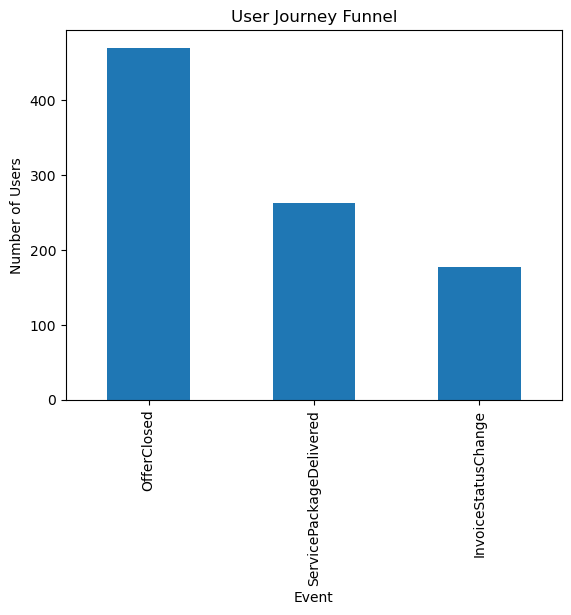

In [29]:
import matplotlib.pyplot as plt

event_counts = df_expanded['EVENT'].value_counts()
event_counts.plot(kind='bar', title='User Journey Funnel')
plt.xlabel('Event')
plt.ylabel('Number of Users')
plt.show()

In [30]:
transition_matrix = df_expanded.groupby(['EVENT', 'detail.data.result']).size().unstack(fill_value=0)
print(transition_matrix)

detail.data.result       Closed Lost  Closed Won  Invoice Sent  cancelled  \
EVENT                                                                       
InvoiceStatusChange               14           6           137         15   
OfferClosed                      211         219            20         15   
ServicePackageDelivered           14           6            20        111   

detail.data.result       completed  
EVENT                               
InvoiceStatusChange              5  
OfferClosed                      5  
ServicePackageDelivered        112  


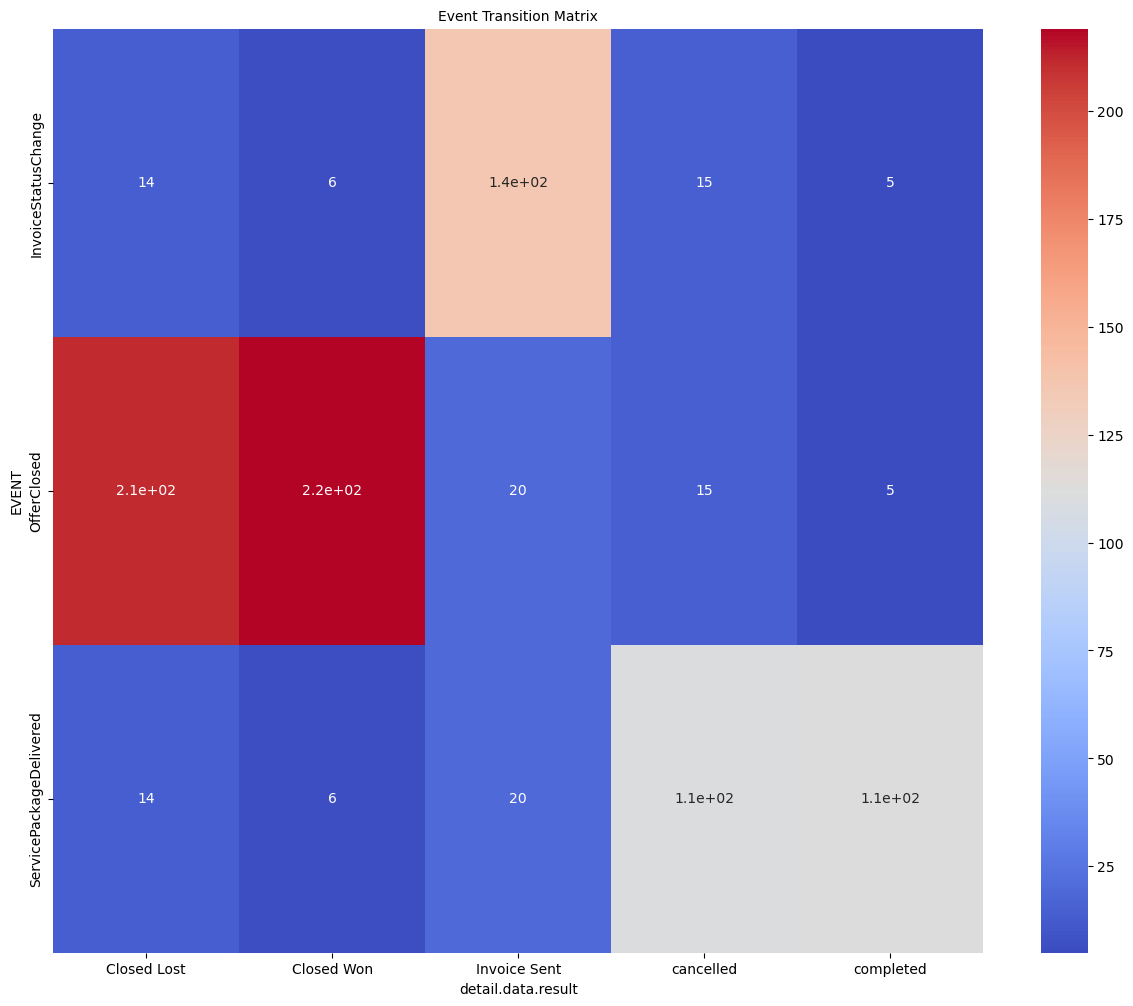

In [36]:
plt.figure(figsize=(15, 12))

sns.heatmap(transition_matrix, annot=True, cmap='coolwarm')

plt.title('Event Transition Matrix', fontsize=10)

plt.show()

In [54]:
df_expanded['timestamp'] = pd.to_datetime(df_expanded['detail.data.finishedDate'].fillna(df_expanded['detail.data.closedDate']).fillna(df_expanded['detail.data.changeDate']))
df_expanded = df_expanded.sort_values(['detail.data.userUuid', 'timestamp'])

df_expanded['time_diff'] = df_expanded.groupby('detail.data.userUuid')['timestamp'].diff()
print(df_expanded[['detail.data.userUuid', 'EVENT', 'time_diff']].head())


                     detail.data.userUuid                EVENT time_diff
115  0062a632-8fcf-4f23-affe-ef483fc82912          OfferClosed       NaT
136  019a72a4-2ea0-4bb6-9917-bbbc0b3ccadf          OfferClosed       NaT
20   01f0ffff-a529-4ae0-ae65-d58ed7d28b80          OfferClosed       NaT
735  01f0ffff-a529-4ae0-ae65-d58ed7d28b80  InvoiceStatusChange   11 days
121  02ebea9a-4aff-4fe0-bfb4-77068003aae0          OfferClosed       NaT


In [58]:
df_expanded['time_diff'].describe()

count                           237
mean     34 days 18:31:53.924050633
std      48 days 20:12:58.889980561
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                69 days 00:00:00
max               197 days 00:00:00
Name: time_diff, dtype: object

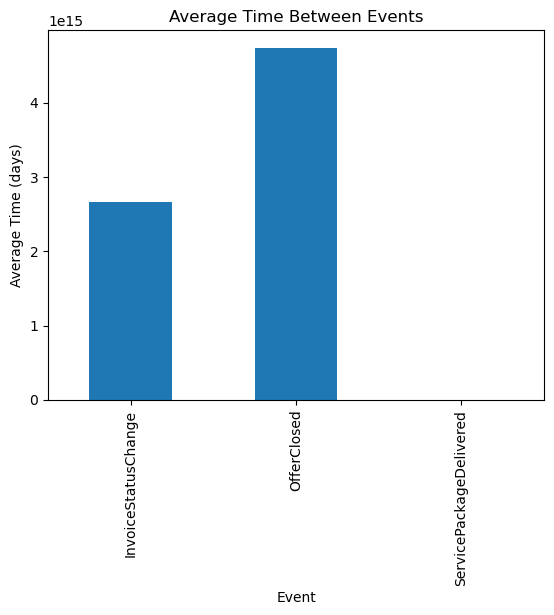

In [67]:
avg_time_diff = df_expanded.groupby('EVENT')['time_diff'].mean()
avg_time_diff.plot(kind='bar', title='Average Time Between Events')
plt.xlabel('Event')
plt.ylabel('Average Time (days)')
plt.show()


In [85]:
# Group by userUuid and aggregate events and results
user_events = df_expanded.groupby('detail.data.userUuid').agg(
    event_sequence=('EVENT', list),
    result_sequence=('detail.data.result', list)
).reset_index()
print(user_events.head())

                   detail.data.userUuid                      event_sequence  \
0  0062a632-8fcf-4f23-affe-ef483fc82912                       [OfferClosed]   
1  019a72a4-2ea0-4bb6-9917-bbbc0b3ccadf                       [OfferClosed]   
2  01f0ffff-a529-4ae0-ae65-d58ed7d28b80  [OfferClosed, InvoiceStatusChange]   
3  02ebea9a-4aff-4fe0-bfb4-77068003aae0  [OfferClosed, InvoiceStatusChange]   
4  0301250f-84f1-45cb-b75a-d4120bf5f308  [InvoiceStatusChange, OfferClosed]   

              result_sequence  
0               [Closed Lost]  
1               [Closed Lost]  
2  [Closed Won, Invoice Sent]  
3  [Closed Won, Invoice Sent]  
4  [Invoice Sent, Closed Won]  


In [86]:
def check_stage_with_result(events, results, target_event):
    if target_event in events:
        index = events.index(target_event)
        return results[index]
    return None


user_events['OfferClosed_result'] = user_events.apply(
    lambda x: check_stage_with_result(x['event_sequence'], x['result_sequence'], 'OfferClosed'), axis=1)
user_events['ServicePackageDelivered_result'] = user_events.apply(
    lambda x: check_stage_with_result(x['event_sequence'], x['result_sequence'], 'ServicePackageDelivered'), axis=1)
user_events['InvoiceStatusChange_result'] = user_events.apply(
    lambda x: check_stage_with_result(x['event_sequence'], x['result_sequence'], 'InvoiceStatusChange'), axis=1)



In [89]:
offer_closed_split = user_events['OfferClosed_result'].value_counts()
service_delivered_split = user_events['ServicePackageDelivered_result'].value_counts()
invoice_status_split = user_events['InvoiceStatusChange_result'].value_counts()

funnel_split = pd.DataFrame({
    'OfferClosed': offer_closed_split,
    'ServicePackageDelivered': service_delivered_split,
    'InvoiceStatusChange': invoice_status_split,
}).fillna(0)
print(funnel_split)



              OfferClosed  ServicePackageDelivered  InvoiceStatusChange
Closed Lost           197                       13                   13
Closed Won            207                        6                    4
Invoice Sent            6                       18                  117


In [95]:
funnel_split = pd.DataFrame({
    'OfferClosed': df_expanded[df_expanded['EVENT'] == 'OfferClosed']['detail.data.result'].value_counts(),
    'ServicePackageDelivered': df_expanded[df_expanded['EVENT'] == 'ServicePackageDelivered']['detail.data.result'].value_counts(),
    'InvoiceStatusChange': df_expanded[df_expanded['EVENT'] == 'InvoiceStatusChange']['detail.data.result'].value_counts()
}).fillna(0)
print(funnel_split)




                    OfferClosed  ServicePackageDelivered  InvoiceStatusChange
detail.data.result                                                           
Closed Lost                 211                       14                   14
Closed Won                  219                        6                    6
Invoice Sent                 20                       20                  137
cancelled                    15                      111                   15
completed                     5                      112                    5


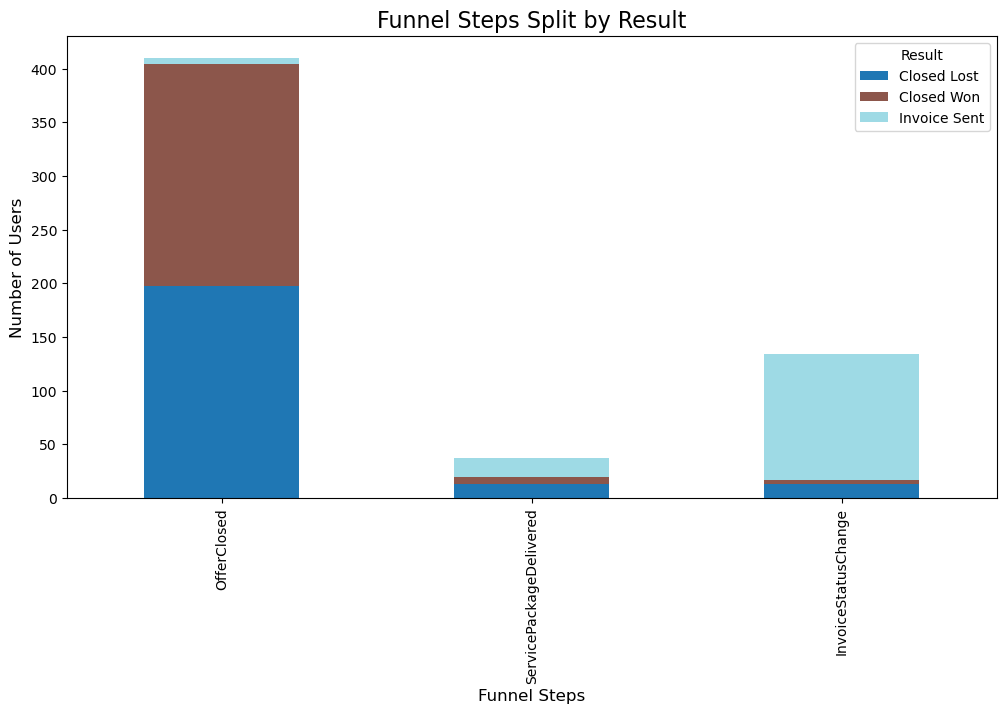

In [91]:
funnel_split.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Funnel Steps Split by Result', fontsize=16)
plt.xlabel('Funnel Steps', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Result', fontsize=10)
plt.show()



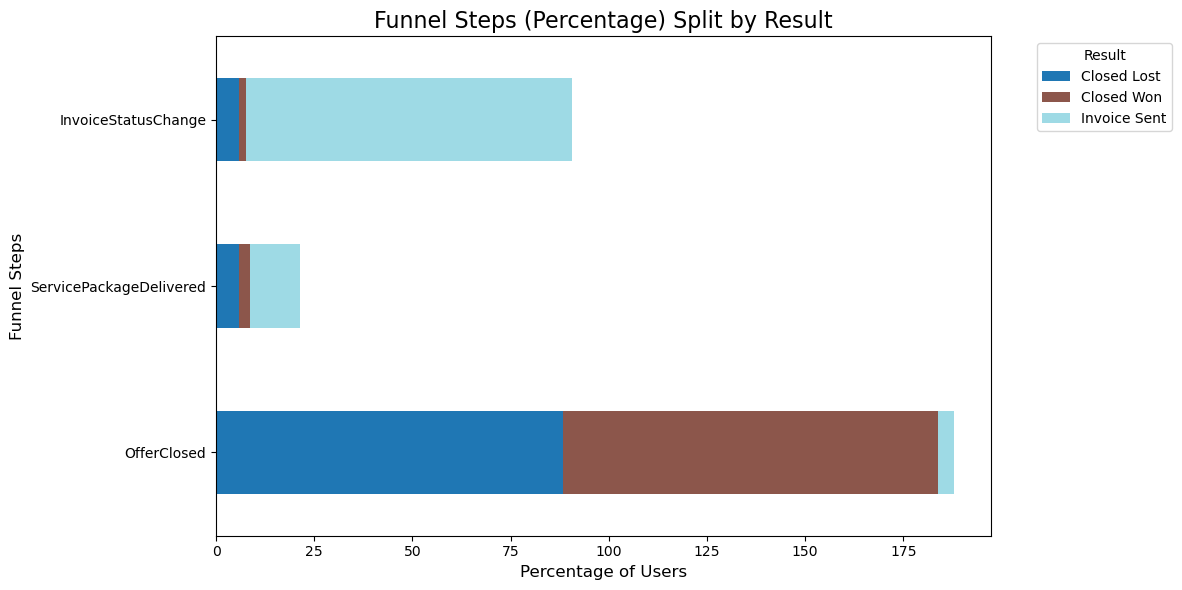

In [92]:
funnel_split_percentage = funnel_split.div(funnel_split.sum(axis=1), axis=0) * 100
funnel_split_percentage.T.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Funnel Steps (Percentage) Split by Result', fontsize=16)
plt.xlabel('Percentage of Users', fontsize=12)
plt.ylabel('Funnel Steps', fontsize=12)
plt.legend(title='Result', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# User journey SQL Code

In [99]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 115 to 669
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   EVENT                            910 non-null    object             
 1   account                          910 non-null    object             
 2   detail-type                      910 non-null    object             
 3   id                               910 non-null    object             
 4   region                           910 non-null    object             
 5   source                           910 non-null    object             
 6   time                             910 non-null    datetime64[ns, UTC]
 7   version                          910 non-null    object             
 8   detail.data.closedDate           470 non-null    datetime64[ns, UTC]
 9   detail.data.documentLinks        647 non-null    object             
 10  detai

In [107]:
query = """
SELECT
    count(distinct `detail.data.userUuid`) AS unique_users,
    count(distinct `detail.metadata.accountId`) AS unique_accounts
FROM df_expanded;
"""
result_df = ps.sqldf(query, locals())
print(result_df)


   unique_users  unique_accounts
0           410              410


Amount of unique users ids matches account ids

Now, regarding time columns, i would consider them as following: 

1.  **closedDate**

$Definition:$ 

The date when a decision or outcome for a transaction or offer was finalized.
It often refers to a status change event, such as "offer accepted/rejected" or "contract closed."



2.  **finishedDate**

$Definition:$

The date when a process or service was completed or fully executed.
It typically occurs after the closedDate, as it involves fulfilling the agreed-upon actions.


Lets check the assumption that finished date always exists with closed date

In [113]:
query = """
SELECT
    SUM(CASE WHEN `detail.data.closedDate` IS NOT NULL AND `detail.data.finishedDate` IS NULL THEN 1 ELSE 0 END) AS closed_not_finished,
    SUM(CASE WHEN `detail.data.closedDate` IS NOT NULL AND `detail.data.finishedDate` IS NOT NULL THEN 1 ELSE 0 END) AS closed_and_finished, 
    SUM(CASE WHEN `detail.data.closedDate` IS NOT NULL AND `detail.data.changeDate` IS NOT NULL THEN 1 ELSE 0 END) AS closed_and_changed,
    SUM(CASE WHEN `detail.data.finishedDate` IS NOT NULL AND `detail.data.changeDate` IS NOT NULL THEN 1 ELSE 0 END) AS finished_and_changed 
FROM df_expanded;
"""
result_df = ps.sqldf(query, locals())
print(result_df)



   closed_not_finished  closed_and_finished  closed_and_changed  \
0                  470                    0                   0   

   closed_and_changed  
0                   0  


That makes sense, because one line represent only one event, if i aggregate on one user, it would be more representative

In [125]:
query = """
select 

    distinct `detail.data.result`
    
from df_expanded

limit 10;
"""
result_df = pd.read_sql_query(query, conn)

display(result_df)

,detail.data.result
0,Closed Lost
1,Closed Won
2,Invoice Sent
3,completed
4,cancelled


In [55]:
import sqlite3

conn = sqlite3.connect(':memory:')

df_expanded.to_sql('df_expanded', conn, index=False, if_exists='replace')

query = """
select 
    `detail.data.userUuid`, 
    DATE(`detail.data.finishedDate`) as finished_date,
    DATE(`detail.data.changeDate`) as change_date,
    DATE(`detail.data.closedDate`) as closed_date,
    TRIM(
        COALESCE(`detail.data.finishedDate`, '') || '' ||
        COALESCE(`detail.data.changeDate`, '') || '' ||
        COALESCE(`detail.data.closedDate`, '')
    ) AS combined_date, 
    `EVENT`, 
    `detail.data.result`
    
from df_expanded
where `detail.data.userUuid` is not null
order by `detail.data.userUuid`
limit 10;
"""
result_df_1 = pd.read_sql_query(query, conn)

display(result_df_1)

,detail.data.userUuid,finished_date,change_date,closed_date,combined_date,EVENT,detail.data.result
0,0062a632-8fcf-4f23-affe-ef483fc82912,None,None,2024-12-04,2024-12-04 00:00:00+00:00,OfferClosed,Closed Lost
1,019a72a4-2ea0-4bb6-9917-bbbc0b3ccadf,None,None,2024-07-04,2024-07-04 00:00:00+00:00,OfferClosed,Closed Lost
2,01f0ffff-a529-4ae0-ae65-d58ed7d28b80,None,None,2024-06-23,2024-06-23 00:00:00+00:00,OfferClosed,Closed Won
3,01f0ffff-a529-4ae0-ae65-d58ed7d28b80,None,2024-07-04,None,2024-07-04T00:00:00Z,InvoiceStatusChange,Invoice Sent
4,02ebea9a-4aff-4fe0-bfb4-77068003aae0,None,None,2024-11-02,2024-11-02 00:00:00+00:00,OfferClosed,Closed Won
5,02ebea9a-4aff-4fe0-bfb4-77068003aae0,None,2024-11-08,None,2024-11-08T00:00:00Z,InvoiceStatusChange,Invoice Sent
6,0301250f-84f1-45cb-b75a-d4120bf5f308,None,None,2024-09-05,2024-09-05 00:00:00+00:00,OfferClosed,Closed Won
7,0301250f-84f1-45cb-b75a-d4120bf5f308,None,2024-09-01,None,2024-09-01T00:00:00Z,InvoiceStatusChange,Invoice Sent
8,03e0bd7c-5fa2-440f-bd29-8efe65762409,None,None,2024-08-11,2024-08-11 00:00:00+00:00,OfferClosed,Closed Won
9,03e0bd7c-5fa2-440f-bd29-8efe65762409,None,2024-12-14,None,2024-12-14T00:00:00Z,OfferClosed,Invoice Sent


I am not taking into consderation all rows without uid, because it would be hard to classify, whther it is related to one person or several

lets build a table to get users journey

In [144]:
query = """
with cte as (
select count (distinct `detail.data.userUuid`) as unique_uid
from df_expanded
)
SELECT 
    cast(COUNT(DISTINCT `detail.data.userUuid`) as float) / (select unique_uid from cte)  AS total_users_proportion,
    EVENT,
    `detail.data.result`,
    COUNT(DISTINCT CASE WHEN EVENT = 'OfferClosed' THEN `detail.data.userUuid` END) AS offer_closed_users  ,
    COUNT(DISTINCT CASE WHEN EVENT = 'ServicePackageDelivered' THEN `detail.data.userUuid` END)  AS service_package_users,
    COUNT(DISTINCT CASE WHEN EVENT = 'InvoiceStatusChange' THEN `detail.data.userUuid` END)  AS invoice_status_users 
FROM df_expanded
GROUP BY EVENT, `detail.data.result`
ORDER BY  total_users_proportion desc;
"""

result_df = pd.read_sql_query(query, conn)

display(result_df)

,total_users_proportion,EVENT,detail.data.result,offer_closed_users,service_package_users,invoice_status_users
0,0.52,OfferClosed,Closed Won,213,0,0
1,0.48,OfferClosed,Closed Lost,197,0,0
2,0.29,InvoiceStatusChange,Invoice Sent,0,0,117
3,0.04,OfferClosed,Invoice Sent,18,0,0
4,0.04,ServicePackageDelivered,Invoice Sent,0,18,0
5,0.03,InvoiceStatusChange,Closed Lost,0,0,13
6,0.03,ServicePackageDelivered,Closed Lost,0,13,0
7,0.01,InvoiceStatusChange,Closed Won,0,0,6
8,0.01,ServicePackageDelivered,Closed Won,0,6,0
9,0.00,InvoiceStatusChange,cancelled,0,0,0


Investigate Drop-Offs:

Analyze why only 8% of users progress from OfferClosed to ServicePackageDelivered. Potential reasons include:
Users losing interest after the offer.
Process inefficiencies preventing service delivery.
Increase Closed Won Conversions:

Although Closed Won dominates the OfferClosed stage, only 1% of users at InvoiceStatusChange are marked as Closed Won. Investigate how to improve retention or engagement at later stages.
Focus on Invoice Sent:

Invoice Sent represents 86% of users at InvoiceStatusChange. Ensure this process is streamlined, as it's the most likely outcome.

In [69]:
query = """
WITH cte AS (
    SELECT 
        `detail.data.userUuid`, 
        DATE(`detail.data.finishedDate`) AS finished_date,
        DATE(`detail.data.changeDate`) AS change_date,
        DATE(`detail.data.closedDate`) AS closed_date,
        TRIM(
            COALESCE(`detail.data.finishedDate`, '') || '' ||
            COALESCE(`detail.data.changeDate`, '') || '' ||
            COALESCE(`detail.data.closedDate`, '')
        ) AS combined_date, 
        `EVENT`, 
        `detail.data.result`,
        TRIM(`EVENT` || ', ' || `detail.data.result`) as step
    FROM df_expanded
    WHERE `detail.data.userUuid` IS NOT NULL
),
filtered_data AS (
    SELECT
        `detail.data.userUuid` AS userUuid,
        combined_date,
        `EVENT`,
        TRIM(`EVENT` || ', ' || `detail.data.result`) AS step,
        ROW_NUMBER() OVER (PARTITION BY `detail.data.userUuid` ORDER BY combined_date) AS event_order,
        FIRST_VALUE(TRIM(`EVENT` || ', ' || `detail.data.result`)) OVER (PARTITION BY `detail.data.userUuid` ORDER BY combined_date ASC) AS first_event,
        FIRST_VALUE(TRIM(`EVENT` || ', ' || `detail.data.result`)) OVER (PARTITION BY `detail.data.userUuid` ORDER BY combined_date DESC) AS final_event
    FROM cte
    WHERE `detail.data.userUuid` IN (
        SELECT `detail.data.userUuid`
        FROM cte
        GROUP BY `detail.data.userUuid`
        HAVING COUNT(*) > 1
    )
),
time_differences AS (
    SELECT
        userUuid,
        step AS current_event,
        LAG(step) OVER (PARTITION BY userUuid ORDER BY combined_date) AS previous_event,
        combined_date AS current_date,
        LAG(combined_date) OVER (PARTITION BY userUuid ORDER BY combined_date) AS previous_date,
        CAST(JULIANDAY(combined_date) - JULIANDAY(LAG(combined_date) OVER (PARTITION BY userUuid ORDER BY combined_date)) AS REAL) AS time_diff_days,
        first_event,
        final_event
    FROM filtered_data
)
SELECT
    userUuid,
    previous_event,
    current_event,
    first_event,
    final_event,
    previous_date,
    current_date,
    time_diff_days
FROM time_differences
WHERE previous_date IS NOT NULL
ORDER BY userUuid, current_date;
"""



result_df = pd.read_sql_query(query, conn)

display(result_df)

,userUuid,previous_event,current_event,first_event,final_event,previous_date,current_date,time_diff_days
0,01f0ffff-a529-4ae0-ae65-d58ed7d28b80,"OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent","OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent",2024-06-23 00:00:00+00:00,2025-01-22,11.0
1,02ebea9a-4aff-4fe0-bfb4-77068003aae0,"OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent","OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent",2024-11-02 00:00:00+00:00,2025-01-22,6.0
2,0301250f-84f1-45cb-b75a-d4120bf5f308,"InvoiceStatusChange, Invoice Sent","OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent","OfferClosed, Closed Won",2024-09-01T00:00:00Z,2025-01-22,4.0
3,03e0bd7c-5fa2-440f-bd29-8efe65762409,"OfferClosed, Closed Won","OfferClosed, Invoice Sent","OfferClosed, Closed Won","OfferClosed, Invoice Sent",2024-08-11 00:00:00+00:00,2025-01-22,125.0
4,03e0bd7c-5fa2-440f-bd29-8efe65762409,"OfferClosed, Invoice Sent","ServicePackageDelivered, Invoice Sent","OfferClosed, Closed Won","OfferClosed, Invoice Sent",2024-12-14T00:00:00Z,2025-01-22,0.0
...,...,...,...,...,...,...,...,...
232,f89453d0-9438-416b-b562-4f06178477af,"OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent","OfferClosed, Closed Won","InvoiceStatusChange, Invoice Sent",2024-06-12 00:00:00+00:00,2025-01-22,171.0
233,f9dbc321-da23-4a84-a3cb-d8eb5e15b80b,"OfferClosed, Closed Won","OfferClosed, Invoice Sent","OfferClosed, Closed Won","OfferClosed, Invoice Sent",2024-06-15 00:00:00+00:00,2025-01-22,166.0
234,f9dbc321-da23-4a84-a3cb-d8eb5e15b80b,"OfferClosed, Invoice Sent","ServicePackageDelivered, Invoice Sent","OfferClosed, Closed Won","OfferClosed, Invoice Sent",2024-11-28T00:00:00Z,2025-01-22,0.0
235,f9dbc321-da23-4a84-a3cb-d8eb5e15b80b,"ServicePackageDelivered, Invoice Sent","InvoiceStatusChange, Invoice Sent","OfferClosed, Closed Won","OfferClosed, Invoice Sent",2024-11-28T00:00:00Z,2025-01-22,0.0


In [80]:
result = (
    result_df
    .groupby(['final_event', 'previous_event', 'current_event'])
    .agg(
        userUuid_count=('userUuid', 'count'),
        time_diff_mean=('time_diff_days', 'mean'),
        time_diff_median=('time_diff_days', 'median')
    )
    .sort_values(by='time_diff_mean', ascending=False)
)
display(result)


userUuid_count  \
final_event                       previous_event                        current_event                                           
OfferClosed, Invoice Sent         OfferClosed, Closed Won               OfferClosed, Invoice Sent                          12   
OfferClosed, Closed Won           InvoiceStatusChange, Invoice Sent     OfferClosed, Closed Won                            56   
InvoiceStatusChange, Invoice Sent OfferClosed, Closed Won               InvoiceStatusChange, Invoice Sent                  49   
OfferClosed, Closed Won           OfferClosed, Invoice Sent             ServicePackageDelivered, Invoice Sent               6   
OfferClosed, Invoice Sent         ServicePackageDelivered, Invoice Sent InvoiceStatusChange, Invoice Sent                  12   
                                  OfferClosed, Invoice Sent             ServicePackageDelivered, Invoice Sent              12   
                                                                        OfferClosed, Invoice Sent                           1   
                                  InvoiceStatusChange, Invoice Sent     InvoiceStatusChange, Invoice Sent                  13   
OfferClosed, Closed Won           ServicePackageDelivered, Invoice Sent ServicePackageDelivered, Invoice Sent               1   
                                                                        InvoiceStatusChange, Invoice Sent                   6   
                                  ServicePackageDelivered, Closed Won   InvoiceStatusChange, Closed Won                     6   
                                  OfferClosed, Invoice Sent             OfferClosed, Invoice Sent                           1   
OfferClosed, Closed Lost          InvoiceStatusChange, Closed Lost      InvoiceStatusChange, Closed Lost                    1   
OfferClosed, Closed Won           OfferClosed, Closed Won               ServicePackageDelivered, Closed Won                 6   
                                                                        OfferClosed, Closed Won                             6   
                                  InvoiceStatusChange, Invoice Sent     InvoiceStatusChange, Invoice Sent                   7   
OfferClosed, Closed Lost          ServicePackageDelivered, Closed Lost  ServicePackageDelivered, Closed Lost                1   
                                                                        InvoiceStatusChange, Closed Lost                   13   
                                  OfferClosed, Closed Lost              ServicePackageDelivered, Closed Lost               13   
                                                                        OfferClosed, Closed Lost                           14   
OfferClosed, Invoice Sent         ServicePackageDelivered, Invoice Sent ServicePackageDelivered, Invoice Sent               1   

                                                                                                               time_diff_mean  \
final_event                       previous_event                        current_event                                           
OfferClosed, Invoice Sent         OfferClosed, Closed Won               OfferClosed, Invoice Sent                   81.000000   
OfferClosed, Closed Won           InvoiceStatusChange, Invoice Sent     OfferClosed, Closed Won                     70.803571   
InvoiceStatusChange, Invoice Sent OfferClosed, Closed Won               InvoiceStatusChange, Invoice Sent           67.428571   
OfferClosed, Closed Won           OfferClosed, Invoice Sent             ServicePackageDelivered, Invoice Sent        0.000000   
OfferClosed, Invoice Sent         ServicePackageDelivered, Invoice Sent InvoiceStatusChange, Invoice Sent            0.000000   
                                  OfferClosed, Invoice Sent             ServicePackageDelivered, Invoice Sent        0.000000   
                                                                        OfferClosed, Invoice Sent              

Key Delays: Significant delays exist in transitions like InvoiceStatusChange → OfferClosed (up to 81 days). These may indicate bottlenecks or inefficient workflows.

Zero-Time Gaps: Events like ServicePackageDelivered often show zero-day gaps, likely due to automated processes. Verify if this is expected or redundant.

Repeated Events: Repeated transitions (e.g., OfferClosed → OfferClosed) with no time differences suggest potential data logging issues or redundant processes.

Action Points:

Focus on optimizing transitions with delays >60 days.
Validate zero-day and repeated events for efficiency.
Segment data (e.g., by user type) to identify patterns causing delays.
These steps can streamline workflows and improve process efficiency.

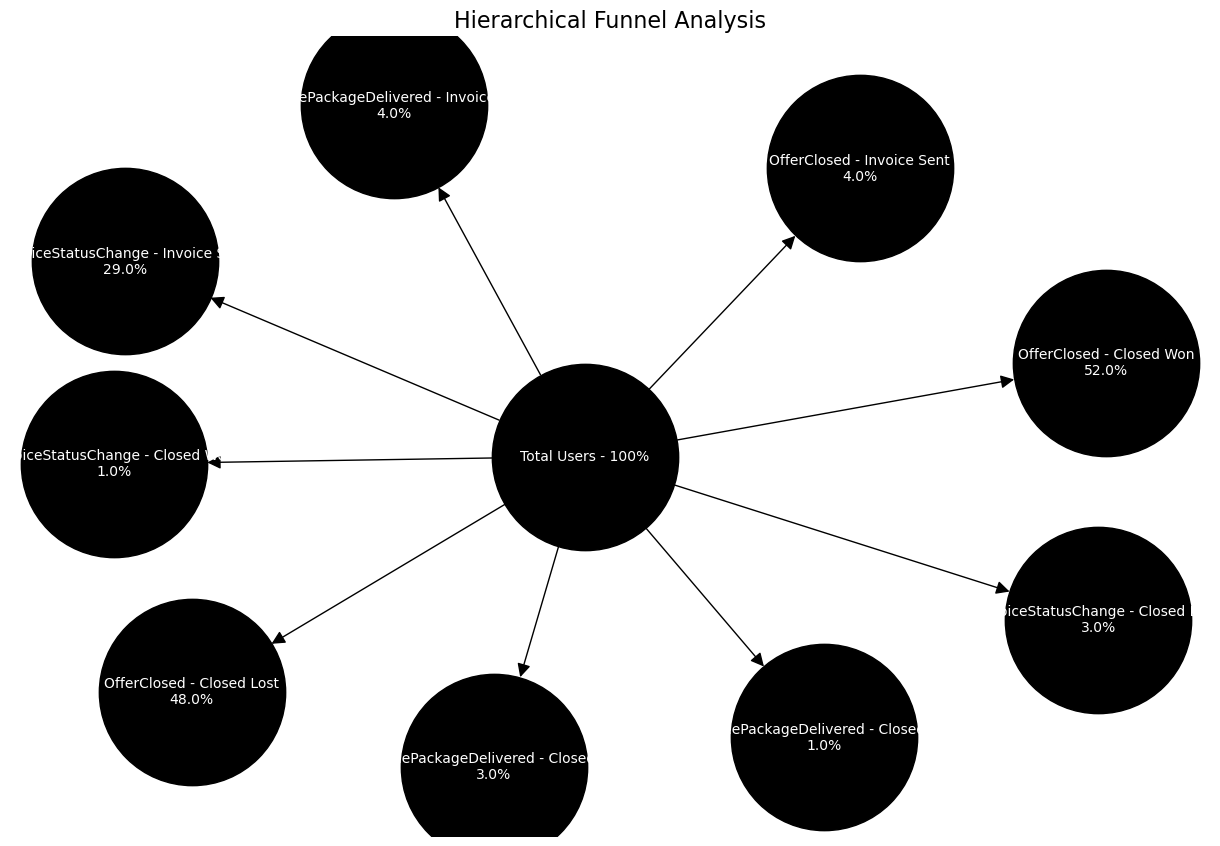

In [13]:
# import matplotlib.pyplot as plt
import networkx as nx


data = [
    {"event": "OfferClosed", "result": "Closed Won", "proportion": 0.52, "offer_closed": 213, "service_package": 0, "invoice_status": 0},
    {"event": "OfferClosed", "result": "Closed Lost", "proportion": 0.48, "offer_closed": 197, "service_package": 0, "invoice_status": 0},
    {"event": "InvoiceStatusChange", "result": "Invoice Sent", "proportion": 0.29, "offer_closed": 0, "service_package": 0, "invoice_status": 117},
    {"event": "OfferClosed", "result": "Invoice Sent", "proportion": 0.04, "offer_closed": 18, "service_package": 0, "invoice_status": 0},
    {"event": "ServicePackageDelivered", "result": "Invoice Sent", "proportion": 0.04, "offer_closed": 0, "service_package": 18, "invoice_status": 0},
    {"event": "InvoiceStatusChange", "result": "Closed Lost", "proportion": 0.03, "offer_closed": 0, "service_package": 0, "invoice_status": 13},
    {"event": "ServicePackageDelivered", "result": "Closed Lost", "proportion": 0.03, "offer_closed": 0, "service_package": 13, "invoice_status": 0},
    {"event": "InvoiceStatusChange", "result": "Closed Won", "proportion": 0.01, "offer_closed": 0, "service_package": 0, "invoice_status": 6},
    {"event": "ServicePackageDelivered", "result": "Closed Won", "proportion": 0.01, "offer_closed": 0, "service_package": 6, "invoice_status": 0},
]

G = nx.DiGraph()


root_node = "Total Users"
G.add_node(root_node, label=f"Total Users - 100%")

for row in data:
    event_result = f"{row['event']} - {row['result']}"
    proportion = f"{row['proportion'] * 100:.1f}%"
    G.add_node(event_result, label=f"{event_result}\n{proportion}")
    G.add_edge(root_node, event_result)


pos = nx.spring_layout(G, seed=42)  # Spring layout for now; hierarchical requires PyGraphviz


plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    labels={node: G.nodes[node]["label"] for node in G.nodes()},
    node_size=18000,
    node_color="black",
    font_color="white",
    font_size=10,
    arrowsize=20,
)
plt.title("Hierarchical Funnel Analysis", fontsize=16)
plt.show()




# Summary 

# Summary of Findings and Recommendations

## **Investigate Drop-Offs**
- **Observation**: Only **8% of users progress from OfferClosed to ServicePackageDelivered**.
  - **Potential Reasons**: 
    - Users may lose interest after the offer.
    - Process inefficiencies could prevent timely service delivery.
  - **Action**: Analyze user behavior and operational bottlenecks during this transition to improve progression rates.

## **Increase Closed Won Conversions**
- **Observation**: While Closed Won dominates at the OfferClosed stage, **only 1% of users at InvoiceStatusChange are marked as Closed Won**.
  - **Action**: Investigate retention and engagement strategies to convert more users at later stages, such as InvoiceStatusChange.

## **Focus on Invoice Sent**
- **Observation**: **86% of users at InvoiceStatusChange progress to Invoice Sent**.
  - **Action**: Ensure the Invoice Sent process is optimized and streamlined, as it is the most common outcome in this stage.

## **Key Delays**
- **Observation**: Significant delays exist in transitions like **InvoiceStatusChange → OfferClosed**, with delays up to **81 days**.
  - **Action**: Address bottlenecks and inefficiencies in these workflows, particularly for high-delay transitions (>60 days).

## **Zero-Time Gaps**
- **Observation**: Events like **ServicePackageDelivered** consistently show **0-day gaps**, likely due to automated or immediate processes.
  - **Action**: Verify if these gaps are expected or reflect redundant or unnecessary event logging.

## **Repeated Events**
- **Observation**: Repeated transitions, such as **OfferClosed → OfferClosed**, with no time differences may suggest:
  - **Data logging issues**.
  - **Redundant processes**.
  - **Action**: Validate the need for these repeated events and ensure the system isn't logging unnecessary actions.

---

## **Action Points**
1. **Optimize Key Transitions**:
   - Focus on transitions with delays >60 days, such as **InvoiceStatusChange → OfferClosed**, to improve process efficiency.

2. **Validate Automated and Repeated Events**:
   - Confirm if zero-time gaps and repeated transitions are expected or require system optimization.

3. **Segment Analysis**:
   - Break down user behavior and delays by segments (e.g., user type, geography) to identify root causes of inefficiencies.

4. **Improve Retention Strategies**:
   - Target points like **InvoiceStatusChange** and **OfferClosed** to reduce drop-offs and improve Closed Won conversions.

